<img src='https://upload.wikimedia.org/wikipedia/fr/thumb/e/ed/Logo_Universit%C3%A9_du_Maine.svg/1280px-Logo_Universit%C3%A9_du_Maine.svg.png' width="300" height="500">
<br>
<div style="border: solid 3px #000;">
    <h1 style="text-align: center; color:#000; font-family:Georgia; font-size:26px;">Infrastructures pour l'IA</h1>
    <p style='text-align: center;'>Master Informatique 1</p>
    <p style='text-align: center;'>Anhony Larcher</p>
</div>

Dans cet exercice nous allons classifier les image sde la base de données MNIST des Support Vector Machine.

## Importez un package qui vous permette de tracer ces graphiques

In [1]:
import matplotlib.pyplot as plt

## Importez des parties de Scikit-Learn

In [2]:
# À partir du package scikit-learn, importez les modules **datasets**, **svm** et **metrics**
from sklearn import datasets,svm,metrics
from sklearn.model_selection import train_test_split
# Importez la méthode **train_test_split** de scikit-learn, à quoi sert cette méthode?


## Téléchargez le corpus MNIST

In [3]:
from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554
X, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False
)

## Visualisez quelques exemples de MNIST
Chaque ligne de X est un vecteur qui contient les 784 valeurs des pixels d'une image 28x28 en niveaux de gris

Affichez les 4 premiers exemples de cette base de données avec leur label

In [4]:
print(X[:4,:])
print(y[:4])
X.shape


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['5' '0' '4' '1']


(70000, 784)

# Préparez vos données

Divisez le corpus MNIST en deu partitions
* **train** qui contient 75% des données 
* **dev** qui contient 25% de données



In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.95)
X_test.shape

(66500, 784)

# Visualisez la répartition des 10 classes dans les deux partitions (train et dev)

In [20]:
import pandas as pd
print(Y_train.shape)
rep_train = pd.Series(Y_train).value_counts()
rep_test = pd.Series(Y_test).value_counts()



rep_test




(3500,)


1    7502
7    6921
3    6775
2    6633
9    6602
0    6552
6    6531
4    6490
8    6489
5    6005
dtype: int64

In [21]:
X_train.shape

(3500, 784)

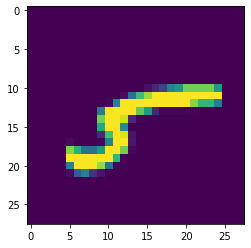

In [22]:
plt.imshow(X_train[:1,:].reshape(28,28))


Text(0, 0.5, 'quantité')

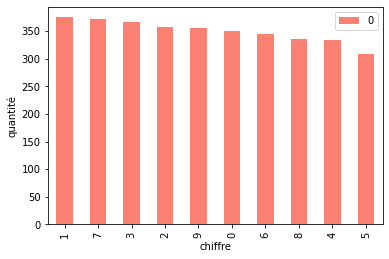

In [35]:
keys = rep_train.keys()
ax = rep_train.plot.bar(color='salmon')
ax.set_xlabel('chiffre')
ax.set_ylabel('quantité')


Text(0, 0.5, 'quantité')

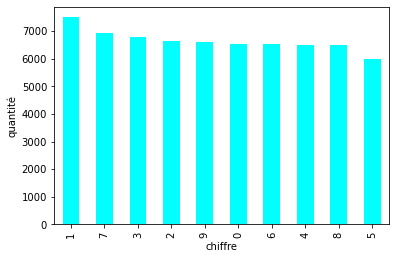

In [36]:
ax = rep_test.plot.bar(color='cyan')
ax.set_xlabel('chiffre')
ax.set_ylabel('quantité')

# Créez un classifieur SVC avec Scikit-Learn

In [40]:
# Model creation + training with train data
model = svm.SVC()
model.fit(X_train,Y_train)



array(['6'], dtype=object)

In [ ]:
# generalisation on X_test
model.predict(X_test[4:5,:])

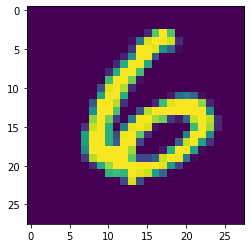

In [41]:
# look at the prediction result
plt.imshow(X_test[4:5,:].reshape(28,28))


Apprenez ce classifieur sur vos données d'apprentissage

Prédisez les classes sur les données de développement avec ce classifieur

Affichez les premiers exemples de test avec leur classe prédite

# Calculez le taux d'identification sur vos donnée de DEV

Puis tracez la matrice de confusion entre les 10 classes

# Avec Scikit-Learn affichez le rapport de classification